<a href="https://colab.research.google.com/github/Praveenramesh0508/Clustering-google-location-data/blob/main/Google_location_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip (133.1 MB)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mpl_toolkits.basemap import Basemap
%matplotlib inline


In [15]:
locat=pd.read_json('Location History.json')


In [16]:
pd.set_option('Display.max_colwidth', 100)
locat.head()


,locations
0,"{'timestampMs': '1513275412249', 'latitudeE7': 129823500, 'longitudeE7': 802052339, 'accuracy': ..."
1,"{'timestampMs': '1513275439044', 'latitudeE7': 129824360, 'longitudeE7': 802054298, 'accuracy': ..."
2,"{'timestampMs': '1513275471483', 'latitudeE7': 129823351, 'longitudeE7': 802052802, 'accuracy': ..."
3,"{'timestampMs': '1513275528865', 'latitudeE7': 129822864, 'longitudeE7': 802052582, 'accuracy': ..."
4,"{'timestampMs': '1513275592970', 'latitudeE7': 129823135, 'longitudeE7': 802052610, 'accuracy': ..."


In [17]:
#Creating new columns with latitude, longitude and timestamp
locat['lat'] = locat['locations'].map(lambda x: x['latitudeE7'])
locat['long'] = locat['locations'].map(lambda x: x['longitudeE7'])
locat['timestamp_ms'] = locat['locations'].map(lambda x: x['timestampMs'])


In [18]:
locat.head()


,locations,lat,long,timestamp_ms
0,"{'timestampMs': '1513275412249', 'latitudeE7': 129823500, 'longitudeE7': 802052339, 'accuracy': ...",129823500,802052339,1513275412249
1,"{'timestampMs': '1513275439044', 'latitudeE7': 129824360, 'longitudeE7': 802054298, 'accuracy': ...",129824360,802054298,1513275439044
2,"{'timestampMs': '1513275471483', 'latitudeE7': 129823351, 'longitudeE7': 802052802, 'accuracy': ...",129823351,802052802,1513275471483
3,"{'timestampMs': '1513275528865', 'latitudeE7': 129822864, 'longitudeE7': 802052582, 'accuracy': ...",129822864,802052582,1513275528865
4,"{'timestampMs': '1513275592970', 'latitudeE7': 129823135, 'longitudeE7': 802052610, 'accuracy': ...",129823135,802052610,1513275592970


In [19]:
#Coverting lat/long to decimalized degree and timestamp_ms to date-time
locat['lat'] = locat['lat'] / 10.**7
locat['long'] = locat['long'] / 10.**7
locat['timestamp_ms'] = locat['timestamp_ms'].astype(float) / 1000
locat['datetime'] = locat['timestamp_ms'].map(lambda x: dt.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
date_range = '{}-{}'.format(locat['datetime'].min()[:4], locat['datetime'].max()[:4])


In [20]:
locat.head()


,locations,lat,long,timestamp_ms,datetime
0,"{'timestampMs': '1513275412249', 'latitudeE7': 129823500, 'longitudeE7': 802052339, 'accuracy': ...",12.982350,80.205234,1.513275e+09,2017-12-14 18:16:52
1,"{'timestampMs': '1513275439044', 'latitudeE7': 129824360, 'longitudeE7': 802054298, 'accuracy': ...",12.982436,80.205430,1.513275e+09,2017-12-14 18:17:19
2,"{'timestampMs': '1513275471483', 'latitudeE7': 129823351, 'longitudeE7': 802052802, 'accuracy': ...",12.982335,80.205280,1.513275e+09,2017-12-14 18:17:51
3,"{'timestampMs': '1513275528865', 'latitudeE7': 129822864, 'longitudeE7': 802052582, 'accuracy': ...",12.982286,80.205258,1.513276e+09,2017-12-14 18:18:48
4,"{'timestampMs': '1513275592970', 'latitudeE7': 129823135, 'longitudeE7': 802052610, 'accuracy': ...",12.982314,80.205261,1.513276e+09,2017-12-14 18:19:52


In [21]:
#Dropping unwanted columns
locat=locat.drop(labels=['locations','timestamp_ms'],axis=1,inplace=False)
locat.head()


,lat,long,datetime
0,12.982350,80.205234,2017-12-14 18:16:52
1,12.982436,80.205430,2017-12-14 18:17:19
2,12.982335,80.205280,2017-12-14 18:17:51
3,12.982286,80.205258,2017-12-14 18:18:48
4,12.982314,80.205261,2017-12-14 18:19:52


In [22]:
#Map colours
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#f5f5f3'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'


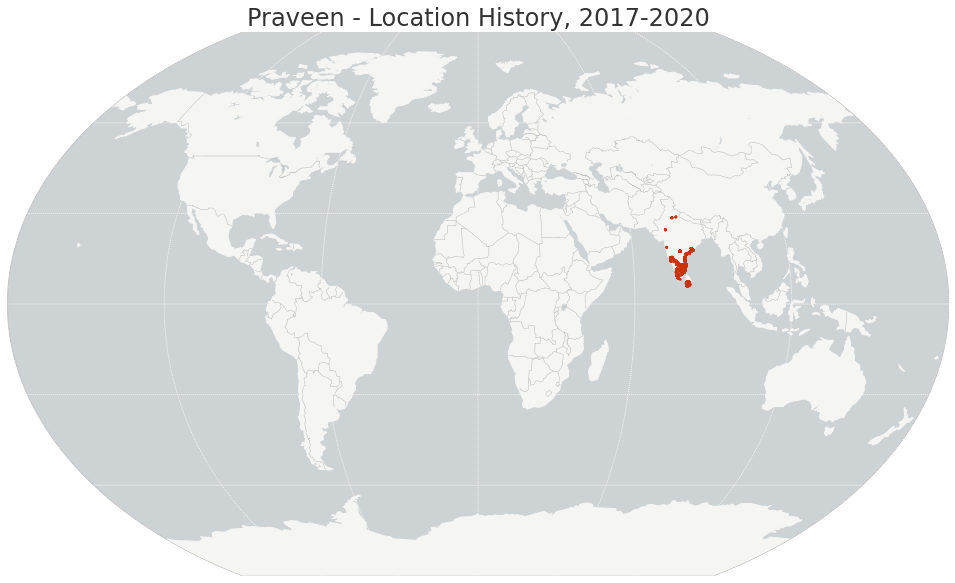

In [28]:
# create the plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Praveen - Location History, {}'.format(date_range), fontsize=24, color='#333333')

#Drawing basemap
m = Basemap(projection='kav7', lon_0=0, resolution='c', area_thresh=10000)
m.drawmapboundary(color=border_color, fill_color=water_color)
m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)

# Projecting the location history points then scatter plotting them
x, y = m(locat['long'].values, locat['lat'].values)
m.scatter(x, y, s=8, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=3)

#Map
plt.savefig('My_location_history')
plt.show()


In [24]:
# Definig a transverse mercator projection for Tamil Nadu, India

map_width_m = 1000 * 1000
map_height_m = 1200 * 1000
target_crs = {'datum':'WGS84',
              'ellps':'WGS84',
              'proj':'tmerc',
              'lon_0':78.656891,
              'lat_0':11.127123}

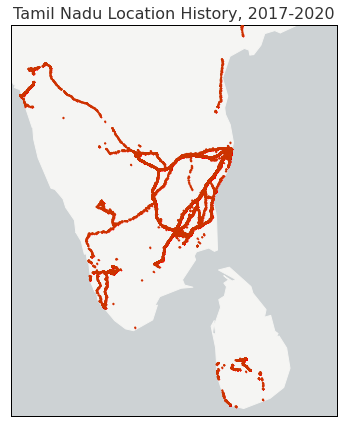

In [25]:
fig_width = 6
fig = plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Tamil Nadu Location History, {}'.format(date_range), fontsize=16, color='#333333')

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='l',
            area_thresh=10000)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

x, y = m(locat['long'].values, locat['lat'].values)
m.scatter(x, y, s=5, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=10)
m.plot(x, y, 'ro', markersize=0.5)

plt.show()